In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data=pd.read_csv('world_population.csv')

df=pd.DataFrame(data)

df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


## Data Cleaning

In [6]:
df.shape

(234, 17)

In [8]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [14]:
df.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020 Population,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015 Population,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010 Population,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000 Population,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990 Population,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980 Population,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970 Population,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


In [16]:
df.duplicated().sum()

0

In [114]:
df.drop(columns=['Rank','CCA3','Capital'],axis=1,inplace=True)

In [20]:
df.columns

Index(['Country/Territory', 'Continent', '2022 Population', '2020 Population',
       '2015 Population', '2010 Population', '2000 Population',
       '1990 Population', '1980 Population', '1970 Population', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'World Population Percentage'],
      dtype='object')

## Exploratory Data Analysis

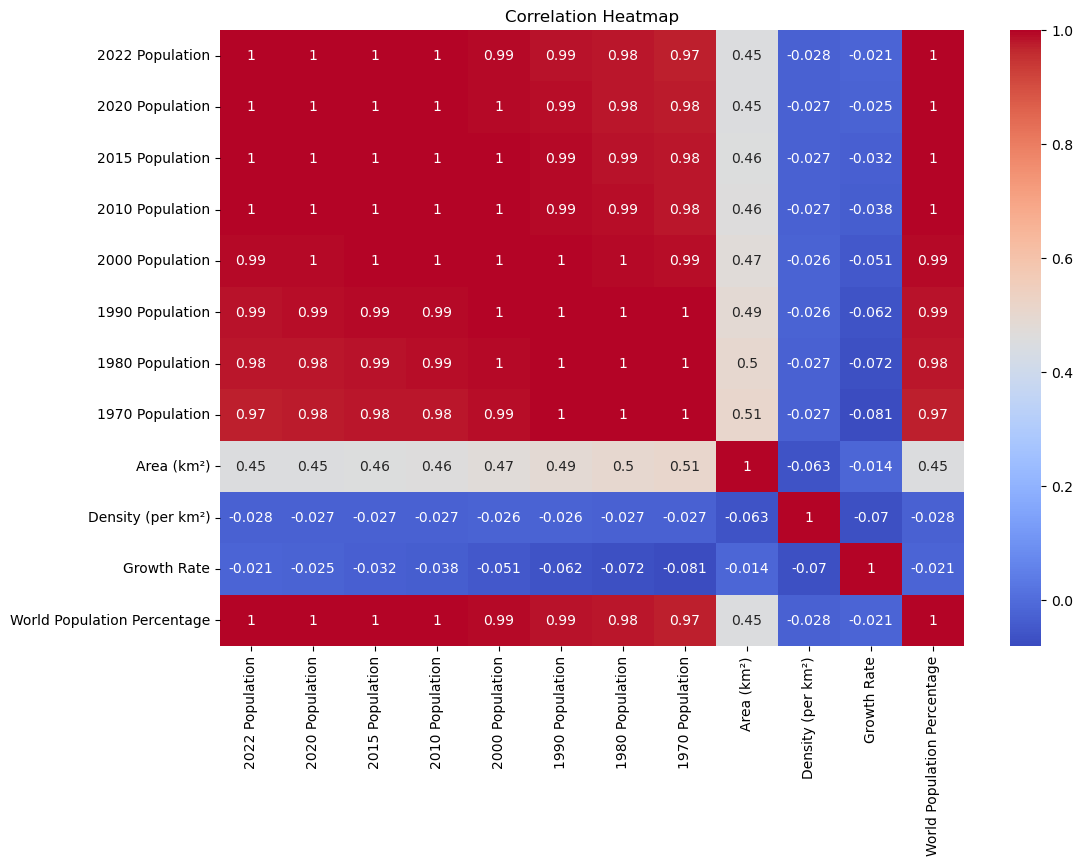

In [23]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

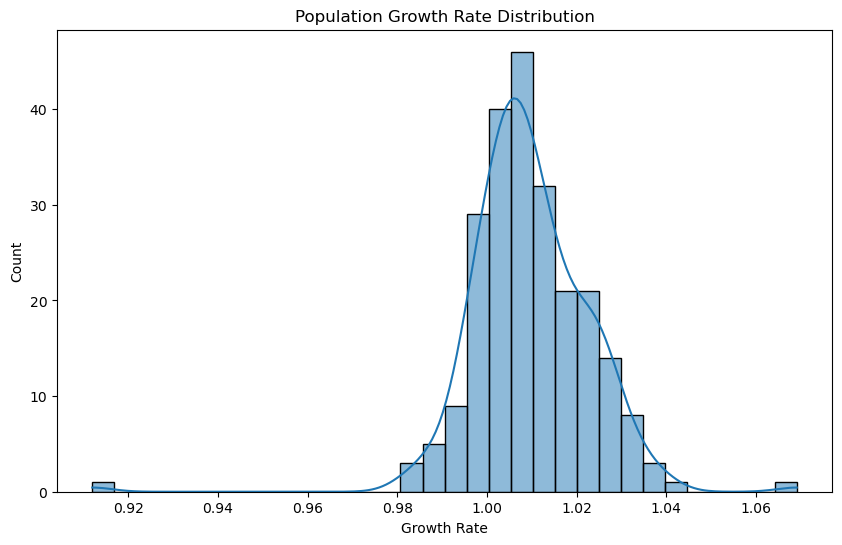

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Growth Rate'], kde=True)
plt.title("Population Growth Rate Distribution")
plt.show()

In [27]:
continent_population=df.groupby('Continent')['2022 Population'].sum().reset_index().sort_values(by='2022 Population',ascending=False)

continent_population

,Continent,2022 Population
1,Asia,4721383274
0,Africa,1426730932
2,Europe,743147538
3,North America,600296136
5,South America,436816608
4,Oceania,45038554


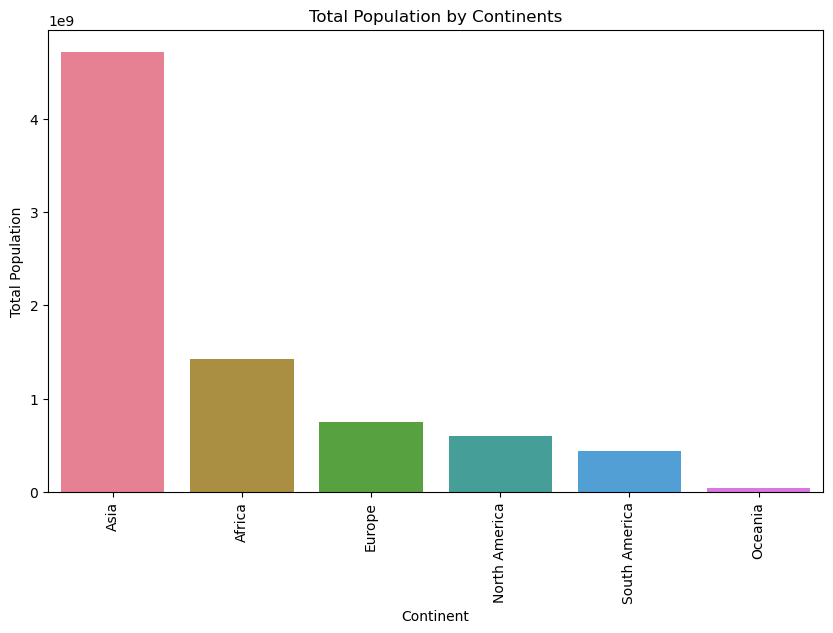

In [31]:
plt.figure(figsize=(10,6))
colors = sns.color_palette('husl', n_colors=6)
sns.barplot(data=continent_population,x='Continent',y='2022 Population',hue='Continent',palette=colors,legend=False)
plt.xlabel('Continent')
plt.ylabel('Total Population')
plt.title("Total Population by Continents")
plt.xticks(rotation=90)
plt.show()

In [33]:
top_10_countries=df.sort_values(by='2022 Population',ascending=False).head(10).iloc[:,:3]

top_10_countries

,Country/Territory,Continent,2022 Population
41,China,Asia,1425887337
92,India,Asia,1417173173
221,United States,North America,338289857
93,Indonesia,Asia,275501339
156,Pakistan,Asia,235824862
149,Nigeria,Africa,218541212
27,Brazil,South America,215313498
16,Bangladesh,Asia,171186372
171,Russia,Europe,144713314
131,Mexico,North America,127504125


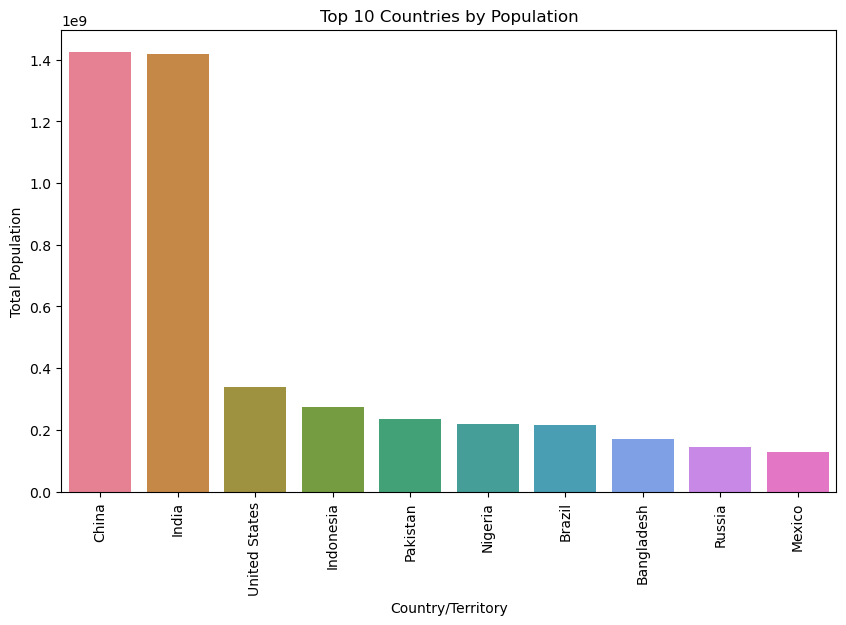

In [39]:
plt.figure(figsize=(10,6))
colors = sns.color_palette('husl', n_colors=10)
sns.barplot(data=top_10_countries,x='Country/Territory',y='2022 Population',hue='Country/Territory',palette=colors,legend=False)
plt.xlabel('Country/Territory')
plt.ylabel('Total Population')
plt.title("Top 10 Countries by Population")
plt.xticks(rotation=90)
plt.show()

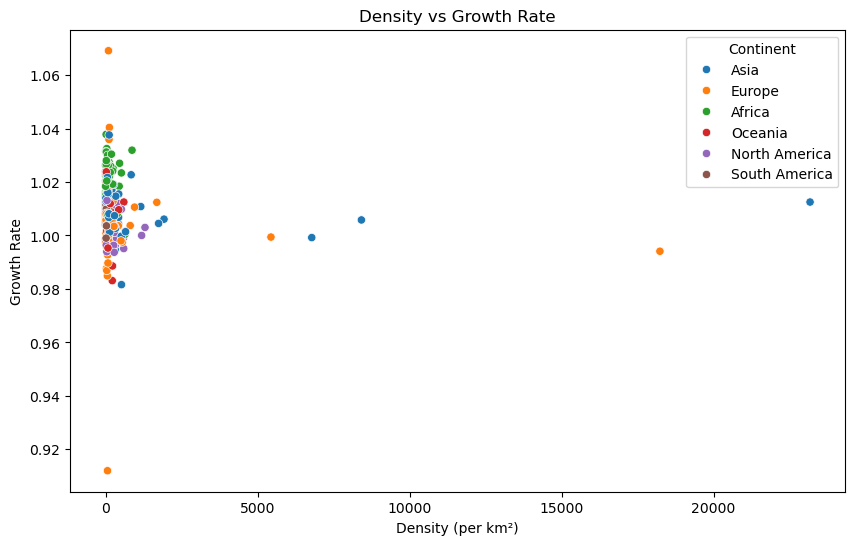

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density (per km²)', y='Growth Rate', hue='Continent', data=df)
plt.title("Density vs Growth Rate")
plt.show()

In [43]:
continent_area=df.groupby('Continent')['Density (per km²)'].sum().reset_index().sort_values(by='Density (per km²)',ascending=False)

continent_area

,Continent,Density (per km²)
1,Asia,51251.2068
2,Europe,33166.2371
3,North America,10910.4703
0,Africa,7127.7158
4,Oceania,3048.4905
5,South America,293.6077


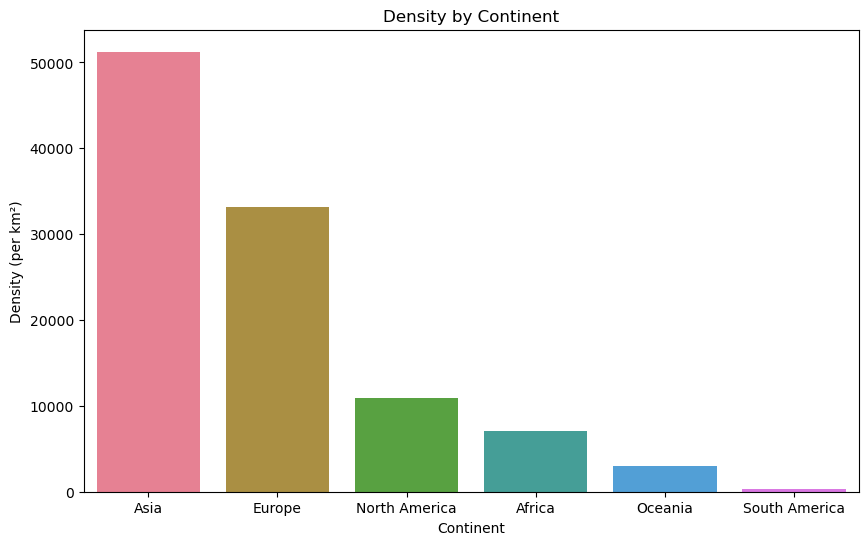

In [45]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', n_colors=6)
sns.barplot(data=continent_area, x='Continent', y='Density (per km²)',hue='Continent',palette=colors,legend=False)
plt.xlabel('Continent')
plt.ylabel('Density (per km²)')
plt.title('Density by Continent')
plt.show()

In [47]:
df_melted = df.melt(id_vars=['Continent'],value_vars=['2022 Population', '2020 Population', '2015 Population','2010 Population',
                                                      '2000 Population', '1990 Population','1980 Population', '1970 Population'],
                    var_name='Year',value_name='Population')

df_melted

,Continent,Year,Population
0,Asia,2022 Population,41128771
1,Europe,2022 Population,2842321
2,Africa,2022 Population,44903225
3,Oceania,2022 Population,44273
4,Europe,2022 Population,79824
...,...,...,...
1867,Oceania,1970 Population,9377
1868,Africa,1970 Population,76371
1869,Asia,1970 Population,6843607
1870,Africa,1970 Population,4281671


In [49]:
df_melted['Year'] = df_melted['Year'].str.replace(' Population', '')

In [51]:
df_melted

,Continent,Year,Population
0,Asia,2022,41128771
1,Europe,2022,2842321
2,Africa,2022,44903225
3,Oceania,2022,44273
4,Europe,2022,79824
...,...,...,...
1867,Oceania,1970,9377
1868,Africa,1970,76371
1869,Asia,1970,6843607
1870,Africa,1970,4281671


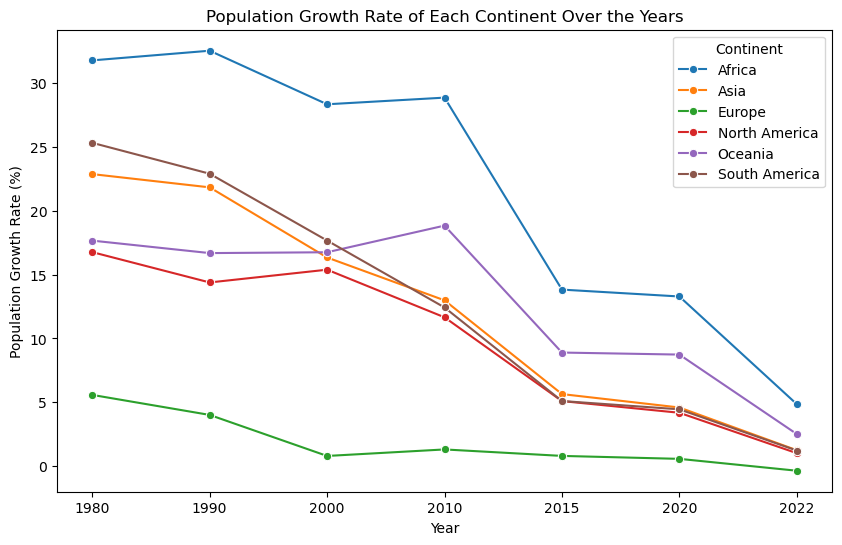

In [53]:
population_by_year = df_melted.groupby(['Continent', 'Year'])['Population'].sum().reset_index()

population_by_year['Growth Rate'] = population_by_year.groupby('Continent')['Population'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=population_by_year, x='Year', y='Growth Rate', hue='Continent', marker='o')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rate of Each Continent Over the Years')
plt.legend(title='Continent')
plt.show()

## Feature Engineering

In [116]:
df.drop(columns=['Continent'],axis=1,inplace=True)

In [118]:
df['Population Change (1970-2022)'] = df['2022 Population'] - df['1970 Population']

df['Average Annual Growth Rate'] = (df['Population Change (1970-2022)'] / df['1970 Population']) / 52 


In [120]:
df.columns

Index(['Country/Territory', '2022 Population', '2020 Population',
       '2015 Population', '2010 Population', '2000 Population',
       '1990 Population', '1980 Population', '1970 Population', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'World Population Percentage',
       'Population Change (1970-2022)', 'Average Annual Growth Rate'],
      dtype='object')

## Encoding Categorical Variable(Country/Territory)

In [126]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Country/Territory'] = label_encoder.fit_transform(df['Country/Territory'])

## Data Scaling

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [94]:
df.head()

,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,-1.724665,0.051690,0.040437,0.015551,-0.013356,-0.060349,-0.123080,-0.079622,-0.074411,0.040260,-0.188712,1.207115,0.054314
1,-1.709861,-0.228850,-0.226417,-0.221689,-0.217275,-0.207138,-0.198879,-0.196580,-0.198997,-0.314379,-0.171342,-1.039007,-0.226173
2,-1.695057,0.079347,0.073545,0.060043,0.048495,0.040420,0.028762,-0.003005,-0.029431,1.024015,-0.210153,0.510817,0.077688
3,-1.680253,-0.249353,-0.247265,-0.243445,-0.240337,-0.235164,-0.232142,-0.232222,-0.232961,-0.330618,-0.111388,-1.982379,-0.249547
4,-1.665449,-0.249092,-0.247032,-0.243289,-0.240202,-0.235094,-0.232083,-0.232189,-0.233068,-0.330465,-0.136568,0.031644,-0.249547


## Model Building

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['2022 Population'])
y = df['2022 Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_pred = rf_model.predict(X_test)

MAE=mean_absolute_error(y_test, rf_pred)

MSE=mean_squared_error(y_test, rf_pred)

r2=r2_score(y_test, rf_pred)

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('R2 Score:', r2)

Mean Absolute Error: 0.025517818709574744
Mean Squared Error: 0.007353888609583621
R2 Score: 0.9580897192945772


## Cross Validation

In [136]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor()

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print("Average R2 score:", cv_scores.mean())

Average R2 score: 0.931383658062121


## Visualization of Results

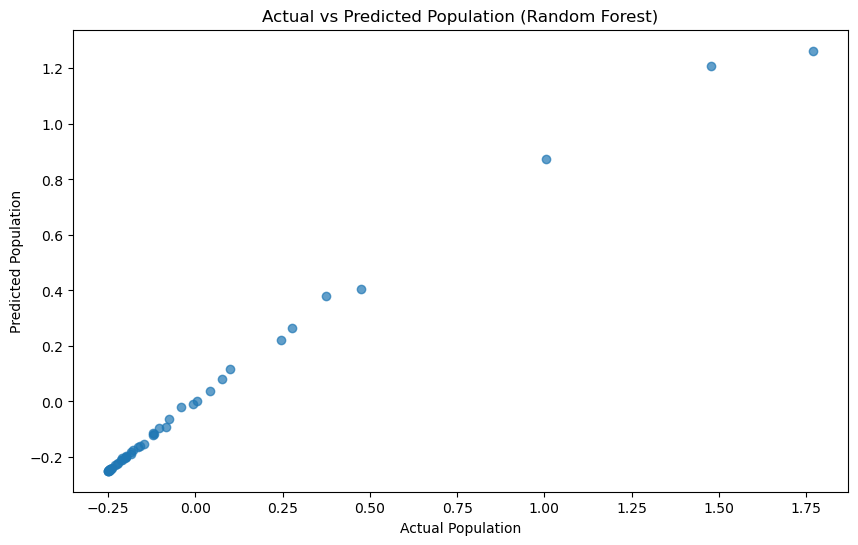

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Actual vs Predicted Population (Random Forest)')
plt.show()